# Regression with ML: Mercari Price Prediction

## Goal
To find best price for each second-hand products which users uplod on mercari   
## 1. Data Preparation

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

,test_id,price
0,0,26.738
1,1,26.738
2,2,26.738
3,3,26.738
4,4,26.738


In [17]:
mercari = pd.read_csv("train.tsv", delimiter="\t")
mercari.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [9]:
mercari_test = pd.read_csv("test.tsv", delimiter="\t")
mercari_test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


## 2. Target and Feature Split

In [19]:
mercari_price = mercari["price"]
mercari_price.head()

0    10.0
1    52.0
2    10.0
3    35.0
4    44.0
Name: price, dtype: float64

In [124]:
mercari_price.shape

(1482535,)

In [125]:
mercari_price.drop(labels=[511535, 861230, 1224924, 1264242], inplace=True)
mercari_price.reset_index(drop=True, inplace=True)
mercari_price.shape

(1482531,)

In [20]:
mercari.drop(["price", "train_id"], axis=1, inplace=True)
mercari.head()

,train_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,0,Complete with certificate of authenticity


In [25]:
mercari.shape

(1482535, 6)

## 3. Convert Data Type

In [24]:
mercari.dtypes

train_id              int64
name                 object
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
item_description     object
dtype: object

In [32]:
len(mercari["brand_name"].unique())

4810

## 4. Missing Value

In [33]:
mercari.isnull().any()

name                 False
item_condition_id    False
category_name         True
brand_name            True
shipping             False
item_description      True
dtype: bool

In [34]:
mercari.isnull().sum()

name                      0
item_condition_id         0
category_name          6327
brand_name           632682
shipping                  0
item_description          4
dtype: int64

I will cut 4 records which have null value in column "item_description".

In [37]:
mercari[mercari["item_description"].isnull()]

,name,item_condition_id,category_name,brand_name,shipping,item_description
511535,Shoes for Michelle,4,Kids/Girls 0-24 Mos/Shoes,NaN,0,NaN
861230,Lipgloss,4,Beauty/Makeup/Lips,NaN,0,NaN
1224924,Disney Minnie Head band,3,Women/Women's Accessories/Hair Accessories,Disney,0,NaN
1264242,For Bianca,3,Women/Women's Accessories/Scarves & Wraps,NaN,1,NaN


In [38]:
mercari.drop(labels=[511535, 861230, 1224924, 1264242], inplace=True)
mercari.shape

(1482531, 6)

In [40]:
mercari["brand_name"].fillna(value="no_brand", inplace=True)

In [41]:
mercari["category_name"].fillna(value="no_category", inplace=True)

In [42]:
mercari.isnull().sum()

name                 0
item_condition_id    0
category_name        0
brand_name           0
shipping             0
item_description     0
dtype: int64

# Policy for each Features
1. Sequencial  Category Data
    - item_condition_id -> MultiLabelEncode
    
    
2. Discrete Category Data
    - shipping -> Binary
    - category_name -> Multiple-One-Hot
    - brand_name -> One-Hot
    
      
3. NLP Data
    - name
    - item_description

## 5. Numerical Values: Outlier Exclusion

In [48]:
mercari_target = pd.DataFrame(mercari_price)
mercari_target.head()

,price
0,10.0
1,52.0
2,10.0
3,35.0
4,44.0


In [ ]:
plt.figure(figsize=(14,8))
sns.distplot(np.log(mercari_price), hist_kws={"color": "Orange"}, kde_kws={"color": "Navy"})
plt.show();

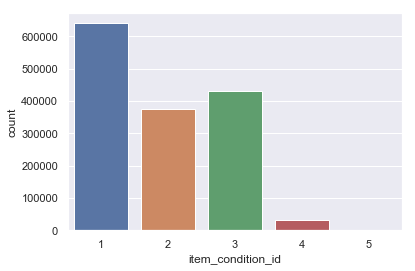

In [44]:
# the condition of the items provided by the seller
sns.set(style="darkgrid")
ax = sns.countplot(x="item_condition_id", data=mercari)

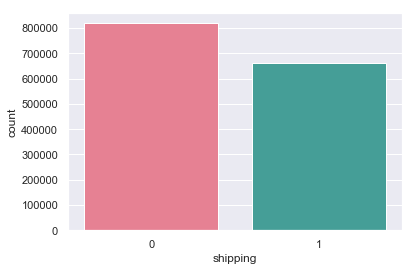

In [62]:
# 1 if shipping fee is paid by seller and 0 by buyer
ax = sns.countplot(x="shipping", data=mercari, palette="husl")

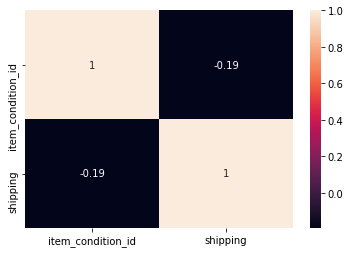

In [43]:
# correlation with above 2 features
numeric_category = ["item_condition_id", "shipping"]
cor = mercari[numeric_category].corr()
sns.heatmap(cor, annot=True)

### column "category_name" 1 to 5

In [99]:
max_length = 3
counter = 0
greater_index_lists = []

for category_text in mercari["category_name"]:
    if category_text == "no_category":
        counter += 1
        continue
    else:
        category_list = category_text.split("/")        
        if len(category_list) > 3:
            greater_index_lists.append(counter) 
            counter += 1
            if len(category_list) > max_length:
                max_length = len(category_list)
        else:
            counter += 1

In [100]:
len(greater_index_lists)

4389

In [101]:
counter

1482531

In [102]:
max_length

5

In [103]:
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
counter = 0

for category_text in mercari["category_name"]:
    
    if category_text == "no_category":
        cat1.append(np.nan)
        cat2.append(np.nan)
        cat3.append(np.nan)
        cat4.append(np.nan)
        cat5.append(np.nan)
        counter += 1
    else:
        category_list = category_text.split("/")
        
        if len(category_list) == 3:
            cat1.append(category_list[0])
            cat2.append(category_list[1])
            cat3.append(category_list[2])
            cat4.append(np.nan)
            cat5.append(np.nan)
            counter += 1
        elif len(category_list) == 4:
            cat1.append(category_list[0])
            cat2.append(category_list[1])
            cat3.append(category_list[2])
            cat4.append(category_list[3])
            cat5.append(np.nan)
            counter += 1       
        elif len(category_list) == 5:
            cat1.append(category_list[0])
            cat2.append(category_list[1])
            cat3.append(category_list[2])
            cat4.append(category_list[3])
            cat5.append(category_list[4])
            counter += 1
        else:
            print("error")
            break
            
new_category = pd.DataFrame({"category_A": cat1, "category_B": cat2, "category_C": cat3, "category_D": cat4, "category_E": cat5})
#len(new_category)
counter

1482531

In [112]:
new_category.shape

(1482531, 5)

In [104]:
mercari.drop("category_name", axis=1, inplace=True)

In [113]:
mercari.shape

(1482531, 5)

In [116]:
mercari.reset_index(drop=True, inplace=True)

In [117]:
mercari_cat = pd.concat([mercari, new_category], axis=1)
mercari_cat.shape

(1482531, 10)

In [118]:
mercari_cat.head()

,name,item_condition_id,brand_name,shipping,item_description,category_A,category_B,category_C,category_D,category_E
0,MLB Cincinnati Reds T Shirt Size XL,3,no_brand,1,No description yet,Men,Tops,T-shirts,NaN,NaN
1,Razer BlackWidow Chroma Keyboard,3,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,NaN,NaN
2,AVA-VIV Blouse,1,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,NaN,NaN
3,Leather Horse Statues,1,no_brand,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,NaN,NaN
4,24K GOLD plated rose,1,no_brand,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,NaN,NaN


In [137]:
a = list(mercari_cat["category_A"].unique())
len(a)

11

In [138]:
b = list(mercari_cat["category_B"].unique())
len(b)

114

In [141]:
for i in range(0, len(a)):
    if a[i] in b:
        print("duplicates!")

duplicates!
duplicates!
duplicates!


In [143]:
df_A = pd.concat([mercari_cat["category_A"], mercari_price], axis=1)
df_A.head()

,category_A,price
0,Men,10.0
1,Electronics,52.0
2,Women,10.0
3,Home,35.0
4,Women,44.0


In [144]:
df_A.shape

(1482531, 2)

In [162]:
plt.rcParams['figure.figsize'] = (400.0, 200.0)

It looks like category_A has some relationship with Price.  

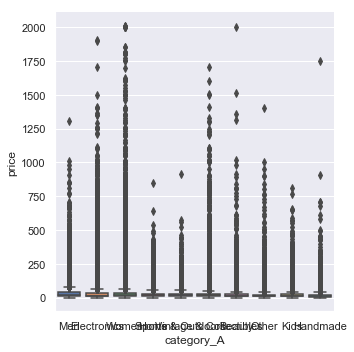

In [163]:
# plt.figure(figsize=(2000, 800))
sns.catplot(x="category_A", y="price", kind="box", data=df_A);
plt.show();

In [171]:
df_B = pd.concat([mercari_cat["category_B"], mercari_price], axis=1)
df_B.head()

,category_B,price
0,Tops,10.0
1,Computers & Tablets,52.0
2,Tops & Blouses,10.0
3,Home Décor,35.0
4,Jewelry,44.0


In [ ]:
plt.figure(figsize=(20, 12))
sns.catplot(x="category_B", y="price", kind="swarm", data=df_B);
plt.show();

## What I found till now about features
Slightly related with Price  
- item_condition_id
- shipping
   
Generally related with Price  
- category_name
- brand_name

Not yet checked
- name
- item_description

### for "brand_name", I will use t-SNE/PCA to reduce about 5k categories to 2D/3D

In [65]:
# count unique value
len(mercari["brand_name"].unique())

4810

I will check the price distribution which has brand or not

In [ ]:
len(mercari["brand_name"])

In [ ]:
index_num = 0
no_brand_index = []
brand_index = []

for v in mercari["brand_name"]:
    if v == "no_brand":
        no_brand_index.append(index_num)
        index_num += 1
    else:
        brand_index.append(index_num)
        index_num += 1

print("Length of no_brand_index: ", len(no_brand_index))
print("Length of brand_index: ", len(brand_index))

In [ ]:
sns.distplot(mercari.ix[no_brand_index, "brand_name"], color="skyblue", label="No Brand")
sns.distplot(mercari.ix[brand_index, "brand_name"], color="red", label="Brand Products")
sns.plt.legend()

# Preorocessing for NLP

I will treat two features "name" and "item_description" as text data.  

#### Process
1. Concat "name" and "item_description"
2. Remove all irrelevant characters such as 24 or @
3. Tokenize your text by separating it into individual words
4. Normalize all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same
5. Lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)
6. Remove "stopwords"
7. Bag of words: TF-IDF
8. Dimensional Reduction: t-SNE and LDA

"name" and "item_description" -> BoW -> 2D or 3D

-----------------------------

* Bag of Words: CountVectorizer & TF-IDF is scaler: from word to scale
* Word Embedding: word2vec, doc2vec, seq2seq is semantic vector

In [ ]:
mercari[["name", "item_description"]].head(10)

In [ ]:
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

# MLPClassifier

# Stacking with RMRegressor, XGBoost, NeuralNetwork